<a href="https://colab.research.google.com/github/asurovi/MSE504/blob/main/Homework_3_AgnilaGhoshSurovi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MSE 504 — Homework 3

**Name: Agnila Ghosh Surovi**

**Department: Mechanical and Aerospace Engineering**

**Date: 9/9/2025**

# Start with the basics!

In [109]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd
import seaborn as sns

## Import Atom Dataset

In [110]:
!gdown https://drive.google.com/uc?id=1SygYRQ4Iom2ZP7dANIyay7NIoCra2bE1

Downloading...
From: https://drive.google.com/uc?id=1SygYRQ4Iom2ZP7dANIyay7NIoCra2bE1
To: /content/atoms.csv
100% 5.89k/5.89k [00:00<00:00, 14.1MB/s]


In [111]:
df = pd.read_csv('/content/atoms.csv')
df.head()

,Symbol,Atomic_radius,Covalent_radius,Density,Pauling_Electronegativity,Electron_affinity,First_Ionisation_Energy,Heat_Evaporation,Melting_Point,Boiling_Point,Specific_Heat,Specific_Volume,Thermal_Conductivity,Max_Oxidation_States
0,H,53,31,0.0708,2.20,72.769,1311.3,0.904,14.01,20.280,14.267,14.1,0.1815,1
1,He,31,28,0.1470,0.00,-50.000,2361.3,0.080,0.95,4.216,5.188,31.8,0.1520,2
2,Li,167,128,0.5340,0.98,59.632,519.9,148.000,553.69,1118.150,3.489,13.1,84.8000,1
3,Be,112,96,1.8480,1.57,-50.000,898.8,309.000,1551.00,3243.000,1.824,5.0,201.0000,2
4,B,87,84,2.3400,2.04,26.989,800.2,504.500,2573.00,3931.000,1.025,4.6,27.4000,3


## Simple statistical analysis



1. Create a histogram of the melting point distribution

# Answer 1:

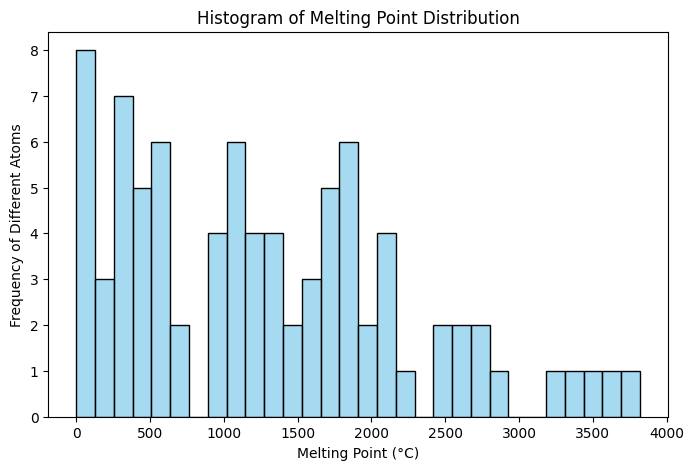

In [112]:
# Plot histogram
plt.figure(figsize=(8,5))
sns.histplot(df["Melting_Point"], bins=30, color="skyblue", edgecolor="black")
plt.title("Histogram of Melting Point Distribution")
plt.xlabel("Melting Point (°C)")
plt.ylabel("Frequency of Different Atoms")
plt.show()

2. Create the boxplot of the melting and boiling points

# Answer 2:

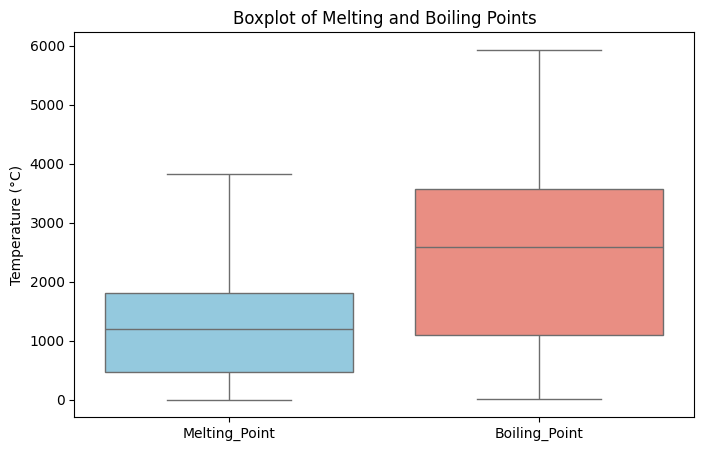

In [113]:
plt.figure(figsize=(8,5))

# Explicitly assign colors for each variable
sns.boxplot(
    data=df[["Melting_Point", "Boiling_Point"]],
    palette={"Melting_Point": "skyblue", "Boiling_Point": "salmon"}
)

plt.title("Boxplot of Melting and Boiling Points")
plt.ylabel("Temperature (°C)")
plt.show()

3. Use the Standard Scaler in the scikit-learn to normalize the values in the table and create the boxplot of all variables. Hint: drop the non-numeric column. In the markdown field, comment on what information does boxplot provide.

# Answer 3:

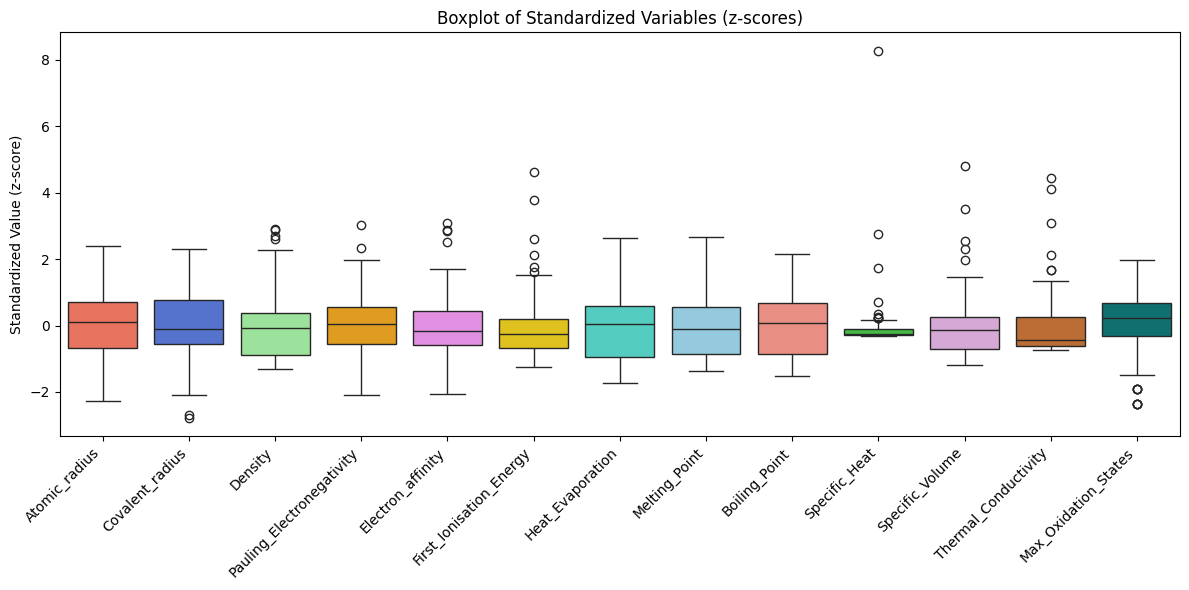

In [114]:
from sklearn.preprocessing import StandardScaler
# 1) Keep only numeric columns (this drops non-numeric like IDs/names)
numeric_df = df.select_dtypes(include="number").copy()

# 2) Standardize (z-score) each numeric column: mean -> 0, std -> 1
scaler = StandardScaler()
scaled = scaler.fit_transform(numeric_df)

scaled_df = pd.DataFrame(scaled, columns=numeric_df.columns, index=numeric_df.index)


# Define a unique color for each of the 13 columns
custom_colors = {
    "Atomic_radius": "tomato",
    "Covalent_radius": "royalblue",
    "Density": "lightgreen",
    "Pauling_Electronegativity": "orange",
    "Electron_affinity": "violet",
    "First_Ionisation_Energy": "gold",
    "Heat_Evaporation": "turquoise",
    "Melting_Point": "skyblue",
    "Boiling_Point": "salmon",
    "Specific_Heat": "limegreen",
    "Specific_Volume": "plum",
    "Thermal_Conductivity": "chocolate",
    "Max_Oxidation_States": "teal"
}

# 3) Boxplot of all standardized variables
plt.figure(figsize=(12,6))
sns.boxplot(data=scaled_df, palette=custom_colors)
plt.title("Boxplot of Standardized Variables (z-scores)")
plt.ylabel("Standardized Value (z-score)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Interpretation of the Boxplot

The boxplot displays the distribution of all standardized variables (expressed as z-scores). After applying the StandardScaler, each variable has mean = 0 and standard deviation = 1, allowing comparison across properties with different original units.

* The **median** (line inside each box) shows the central tendency of each variable relative to 0.
* The **box (Inter Quartile Range (IQR))** shows the spread of the middle 50% of the data.
* **Whiskers and dots** highlight the presence of extreme values (maximum and minimum) and outliers.

From the plot, Specific_Heat, Specific_Volume, First_Ionisation_Energy and Thermal_Conductivity have many outliers and wide spread, while Atomic_radius and Covalent_radius are more compact. This comparison helps to identify which properties vary more widely and which are more stable across the dataset.

4. Explore other ways to represent statistical distribution of a single parameter.

# Answer 4:

#### Density Plot
* Smooth curve estimate of the probability density.

* Better than histogram for continuous distributions.

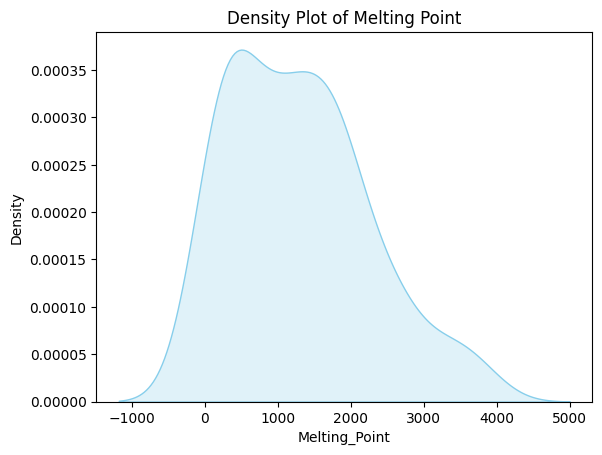

In [115]:
sns.kdeplot(df["Melting_Point"], fill=True, color="skyblue")
plt.title("Density Plot of Melting Point")
plt.show()


#### Violin Plot
* Combines boxplot + KDE.

* Shows distribution shape and summary stats.

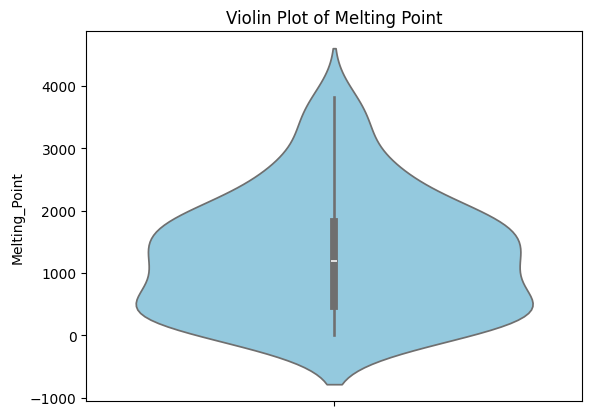

In [116]:
sns.violinplot(y=df["Melting_Point"], color="skyblue")
plt.title("Violin Plot of Melting Point")
plt.show()


#### ECDF (Empirical Cumulative Distribution Function)

* Shows the cumulative probability.

* Useful to see thresholds and percentiles.

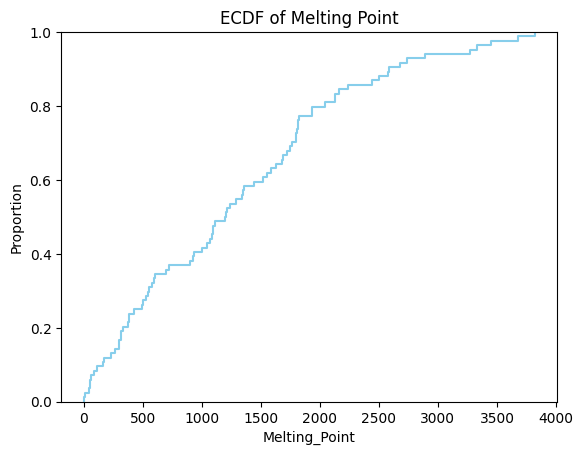

In [117]:
sns.ecdfplot(df["Melting_Point"], color="skyblue")
plt.title("ECDF of Melting Point")
plt.show()


## Correlation analysis

5. Plot the correlation between the melting point and boiling point and between covalent radius and density. In the markdown section, rationalize the observations.

# Answer 5:

Answer 5:

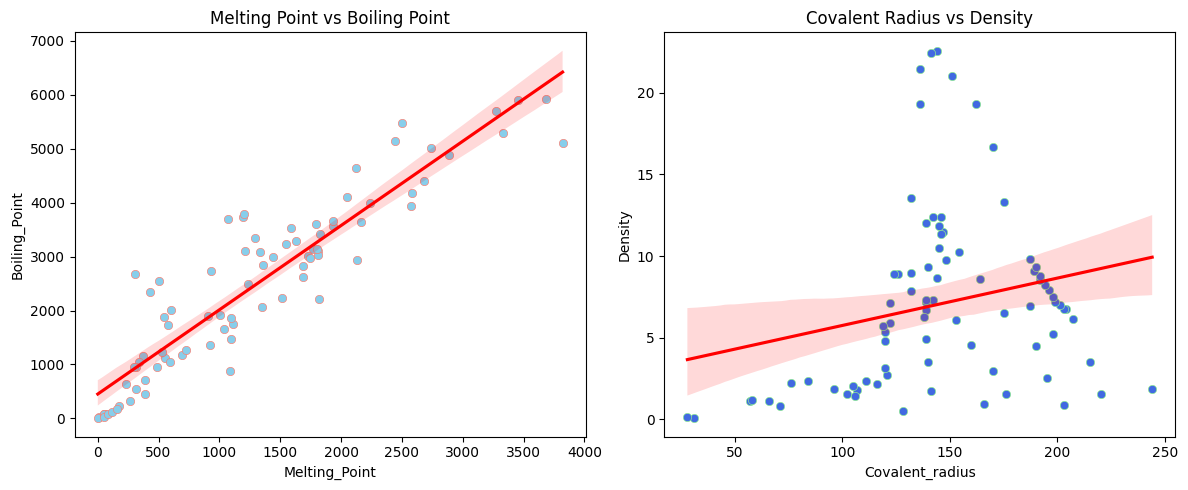

In [118]:
plt.figure(figsize=(12,5))

# Plot 1: Melting Point vs Boiling Point
plt.subplot(1,2,1)
sns.scatterplot(x="Melting_Point", y="Boiling_Point", data=df, color="skyblue", edgecolor="salmon")
sns.regplot(x="Melting_Point", y="Boiling_Point", data=df, scatter=False, color="red")  # trendline
plt.title("Melting Point vs Boiling Point")

# Plot 2: Covalent Radius vs Density
plt.subplot(1,2,2)
sns.scatterplot(x="Covalent_radius", y="Density", data=df, color="royalblue", edgecolor="lightgreen")
sns.regplot(x="Covalent_radius", y="Density", data=df, scatter=False, color="red")  # trendline
plt.title("Covalent Radius vs Density")

plt.tight_layout()
plt.show()

#### Interpretation

* **Melting Point vs Boiling Point:** A strong positive correlation is expected, since substances with higher melting points usually also have higher boiling points. Both depend on the strength of intermolecular or atomic bonding: stronger bonds require more energy to overcome, raising both transition temperatures.

* **Covalent Radius vs Density:** A negative correlation is expected, because larger atomic/covalent radii generally lead to lower density (atoms take up more volume for a given mass). Smaller atoms can pack more closely, resulting in higher density.

6. Create a heatmap of correlation coefficients between the entries in the table. Find by direct examination the groups of parameters with strongest positive and strongest negative correlations. In the markdown section, rationalize the observations.

# Answer 6:

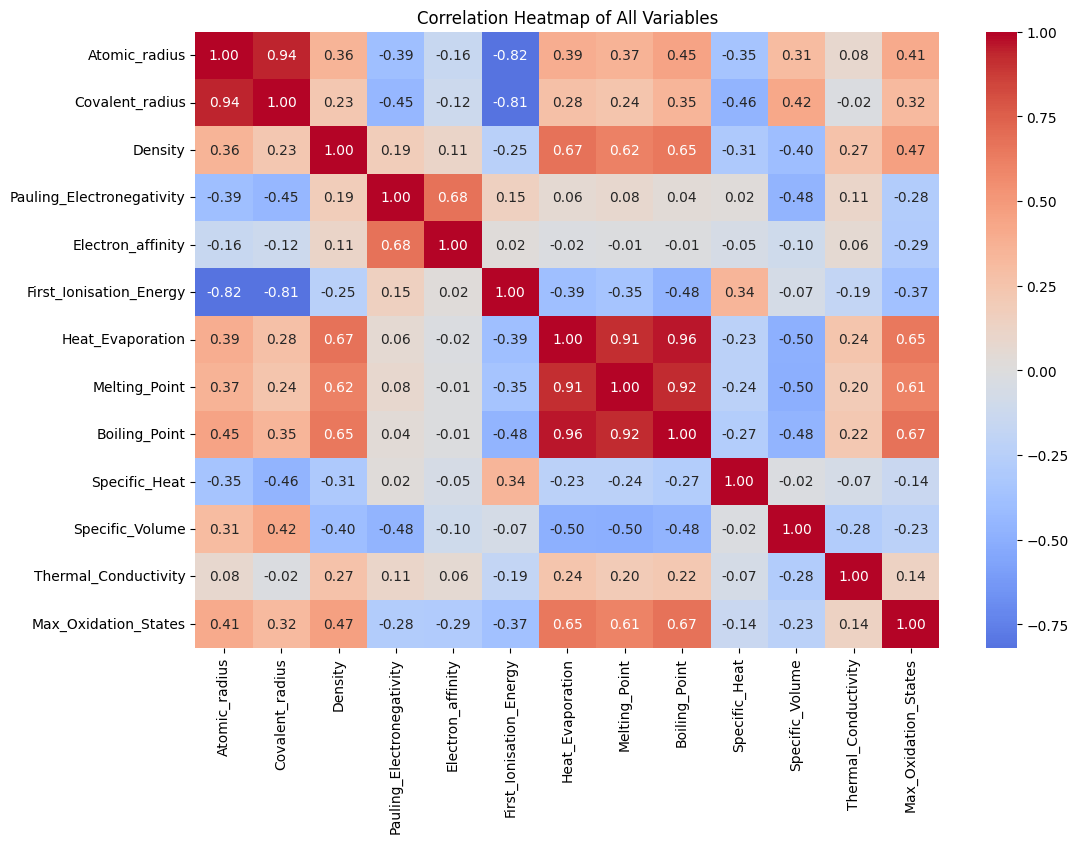

In [119]:
# 1) Keep only numeric columns
numeric_df = df.select_dtypes(include="number")

# 2) Compute correlation matrix
corr = numeric_df.corr()

# 3) Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of All Variables")
plt.show()

#### Strongest Positive Correlations

* **Melting Point ↔ Boiling Point (0.92)** – Substances with higher melting points also tend to have higher boiling points, since both depend on bond strength.
* **Heat of Evaporation ↔ Boiling Point (0.96)** – The higher the energy required to evaporate, the higher the boiling point.
* **Atomic Radius ↔ Covalent Radius (0.94)** – Both describe atomic size and are closely related.

#### Strongest Negative Correlations

* **First Ionisation Energy ↔ Atomic Radius (-0.82)** – Larger atoms hold outer electrons less tightly, lowering ionisation energy.
* **First Ionisation Energy ↔ Covalent Radius (-0.81)** – Same reasoning: bigger radii → weaker electron binding.
* **Specific Volume ↔ Melting Point (-0.50)** – Higher melting point materials tend to have more compact atomic packing (smaller specific volume).

#### Rationale

* **Bond-related properties** (melting, boiling, heat of evaporation) correlate positively because stronger bonds raise all phase-change temperatures.
* **Size vs. energy properties** show strong negative correlation: larger atoms (greater radius) have lower ionisation energies.
* **Packing density** explains why higher melting point substances often occupy smaller volume per unit mass, giving negative correlation with specific volume.

7. Create a pair distribution plot of Atomic_radius, Covalent_radius,Pauling_Electronegativity and First_Ionisation_Energy

---



# Answer 7:

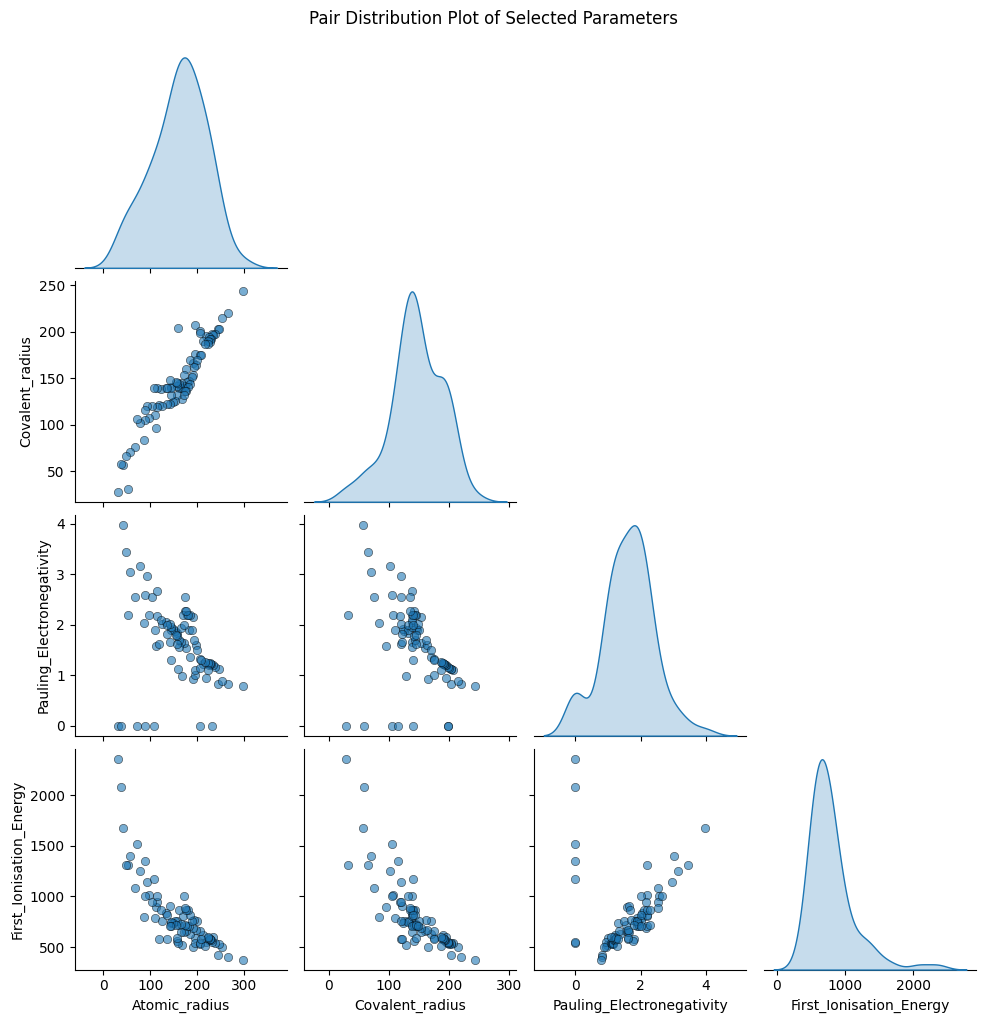

In [120]:
# Select the subset of variables
subset = df[["Atomic_radius", "Covalent_radius", "Pauling_Electronegativity", "First_Ionisation_Energy"]]

# Create pairplot
sns.pairplot(subset, diag_kind="kde", corner=True, plot_kws={"alpha":0.6, "edgecolor":"k"})
plt.suptitle("Pair Distribution Plot of Selected Parameters", y=1.02)
plt.show()

## Simple Regression

8. Perform a linear fit between the boiling temperature and melting temperature and between specific heat and melting point. Provide the values of fit coefficients and units.

# Answer 8:

Fit 1: Boiling Point vs Melting Point
Equation: Boiling_Point = 1.563 * Melting_Point + 450.835
Slope units: (°C / °C), Intercept units: °C

Fit 2: Specific Heat vs Melting Point
Equation: Specific_Heat = -0.000409 * Melting_Point + 1.169237
Slope units: (J/g·K per °C), Intercept units: J/g·K


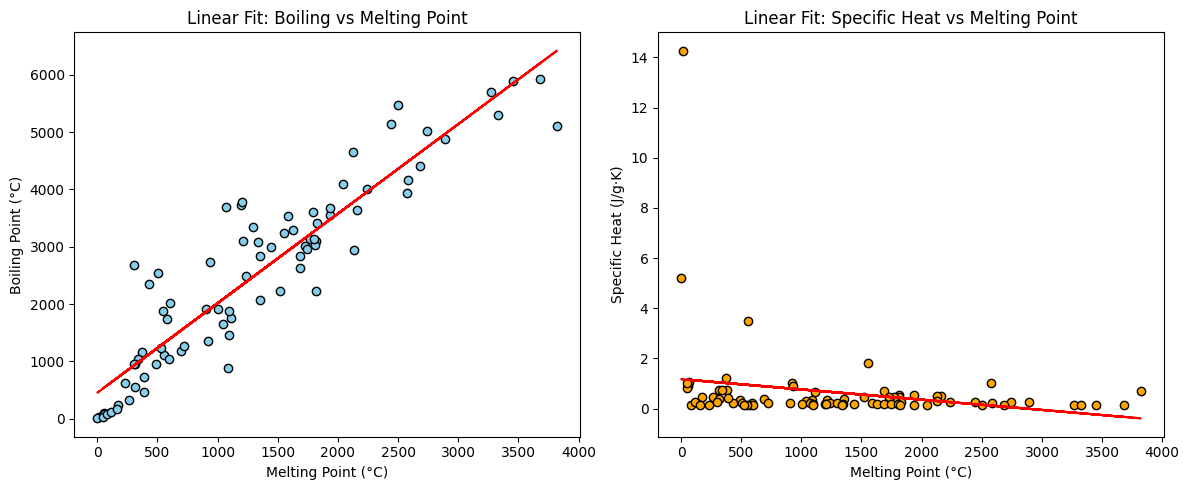

In [121]:
from sklearn.linear_model import LinearRegression

# 1) Boiling Point vs Melting Point
X1 = df[["Melting_Point"]]  # predictor (°C)
y1 = df["Boiling_Point"]    # response (°C)

model1 = LinearRegression().fit(X1, y1)
slope1, intercept1 = model1.coef_[0], model1.intercept_

print("Fit 1: Boiling Point vs Melting Point")
print(f"Equation: Boiling_Point = {slope1:.3f} * Melting_Point + {intercept1:.3f}")
print(f"Slope units: (°C / °C), Intercept units: °C")

# 2) Specific Heat vs Melting Point
X2 = df[["Melting_Point"]]  # predictor (°C)
y2 = df["Specific_Heat"]    # response (J/g·K) or similar

model2 = LinearRegression().fit(X2, y2)
slope2, intercept2 = model2.coef_[0], model2.intercept_

print("\nFit 2: Specific Heat vs Melting Point")
print(f"Equation: Specific_Heat = {slope2:.6f} * Melting_Point + {intercept2:.6f}")
print(f"Slope units: (J/g·K per °C), Intercept units: J/g·K")

# Optional: Plot fits
fig, ax = plt.subplots(1,2, figsize=(12,5))

# Plot 1
ax[0].scatter(X1, y1, color="skyblue", edgecolor="black")
ax[0].plot(X1, model1.predict(X1), color="red")
ax[0].set_xlabel("Melting Point (°C)")
ax[0].set_ylabel("Boiling Point (°C)")
ax[0].set_title("Linear Fit: Boiling vs Melting Point")

# Plot 2
ax[1].scatter(X2, y2, color="orange", edgecolor="black")
ax[1].plot(X2, model2.predict(X2), color="red")
ax[1].set_xlabel("Melting Point (°C)")
ax[1].set_ylabel("Specific Heat (J/g·K)")
ax[1].set_title("Linear Fit: Specific Heat vs Melting Point")

plt.tight_layout()
plt.show()

# Explore the classification

Let's create a simple data set that will allow us to explore several simple classifiers


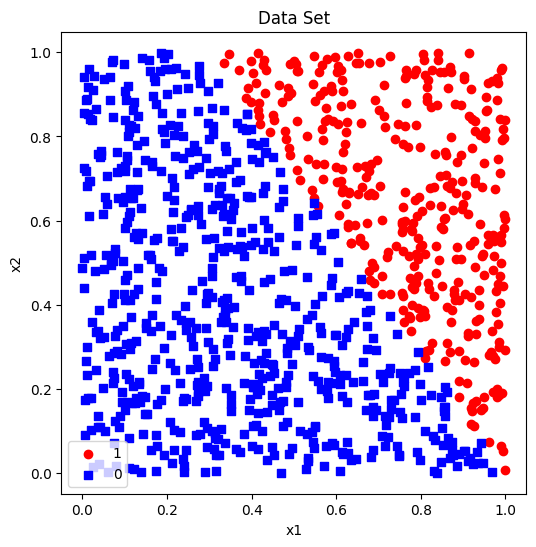

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Generate features
n = 1000
x1 = np.random.uniform(0, 1, n)
x2 = np.random.uniform(0, 1, n)

# Calculate targets
y = (x1 + 0.7*x2 >= 1).astype(int)

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(x1[y == 1], x2[y == 1], c='red', marker='o', label='1')
plt.scatter(x1[y == 0], x2[y == 0], c='blue', marker='s', label='0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Data Set')
plt.show()

X1 = np.column_stack((x1, x2))
y1 = y

9. Experiment with the different classifiers for this data set:
- Create train-test split (say 30-70)
- Build the decision tree classifier
- Explore the outputs if you vary the depth of the tree
- And see how the performance changes if you change the number of points in the data set (say compare 100 and 1000)
- Visualize the decision surface (use examples from class Colab)

# Answer 9:

* Create train-test split (say 30-70)

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train-test split (30% train, 70% test)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.7, random_state=42)


* Build the decision tree classifier

In [124]:
# Train decision tree with default depth
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions & accuracy
y_pred = clf.predict(X_test)
print("Accuracy (default depth):", accuracy_score(y_test, y_pred))

Accuracy (default depth): 0.9385714285714286


* Explore the outputs if you vary the depth of the tree

In [125]:
depths = [1, 2, 3, 5, 10, None]  # None = unlimited depth
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Depth {d}: Accuracy = {acc:.3f}")

Depth 1: Accuracy = 0.816
Depth 2: Accuracy = 0.890
Depth 3: Accuracy = 0.896
Depth 5: Accuracy = 0.930
Depth 10: Accuracy = 0.939
Depth None: Accuracy = 0.939


* And see how the performance changes if you change the number of points in the data set (say compare 100 and 1000)

In [126]:
for n in [100, 1000]:
    x1 = np.random.uniform(0, 1, n)
    x2 = np.random.uniform(0, 1, n)
    y = (x1 + 0.7*x2 >= 1).astype(int)
    X = np.column_stack((x1, x2))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = DecisionTreeClassifier(max_depth=5, random_state=42)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"Dataset size {n}: Accuracy = {acc:.3f}")


Dataset size 100: Accuracy = 0.933
Dataset size 1000: Accuracy = 0.980


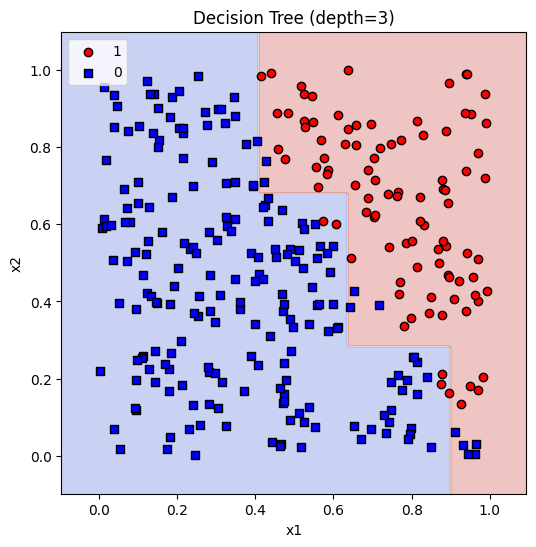

In [127]:
def plot_decision_surface(clf, X, y, title):
    plt.figure(figsize=(6,6))  # set fixed size (width=6, height=6)
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    # plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolor="k")

    # Plot points with different markers
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red', marker='o', edgecolor="k", label="1")
    plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', marker='s', edgecolor="k", label="0")
    plt.legend()
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

# Example: depth = 3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
plot_decision_surface(clf, X_test, y_test, "Decision Tree (depth=3)")


10. Do the same for the perceptron classifier

# Answer 10:

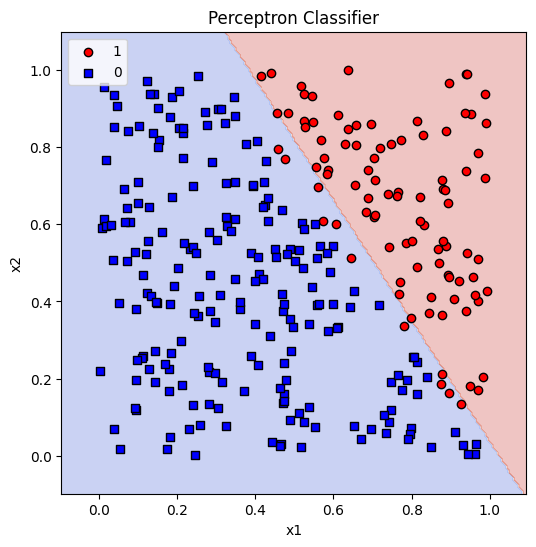

In [128]:
from sklearn.linear_model import Perceptron

def plot_decision_surface(model, X, y, title):
    plt.figure(figsize=(6,6))

    # Step 1: Define grid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Step 2: Predict on grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Step 3: Plot background regions
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # Step 4: Plot real data points with correct markers
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red', marker='o', edgecolor="k", label="1")
    plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', marker='s', edgecolor="k", label="0")

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.legend()
    plt.show()

# 🔹 Train Perceptron
perceptron = Perceptron(random_state=42, max_iter=1000, tol=1e-3)
perceptron.fit(X_train, y_train)

# 🔹 Plot decision surface
plot_decision_surface(perceptron, X_test, y_test, "Perceptron Classifier")


11. Do the same for the logistics regression classifier
- Experiment with the regularization parameters
- Can you plot the data for small number of points but also add class probabilities?

# Answer 11:

* Experiment with the regularization parameters

Accuracy (C=1.0): 0.987
Coefficients [w1, w2]: [8.54194645 5.73980925] Intercept b: -8.445842633869798


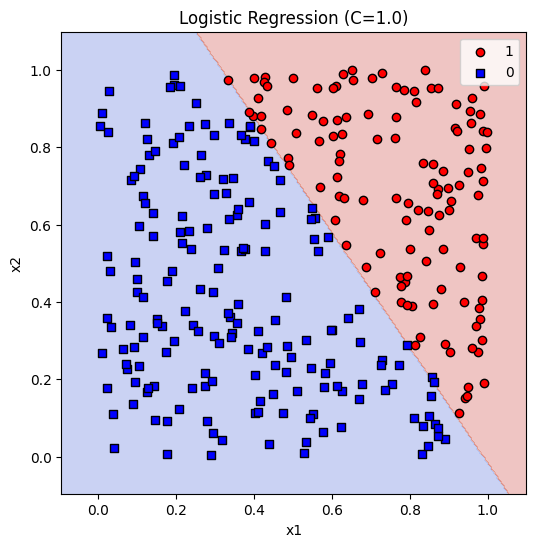

C=0.01    Acc=0.597  w=[0.58586946 0.32918472]  b=-1.110
C=0.1     Acc=0.897  w=[3.10469404 1.86369351]  b=-3.234
C=1       Acc=0.987  w=[8.54194645 5.73980925]  b=-8.446
C=10      Acc=0.987  w=[19.21934272 13.5338133 ]  b=-19.082
C=100     Acc=0.983  w=[41.7856657  29.62757372]  b=-41.550


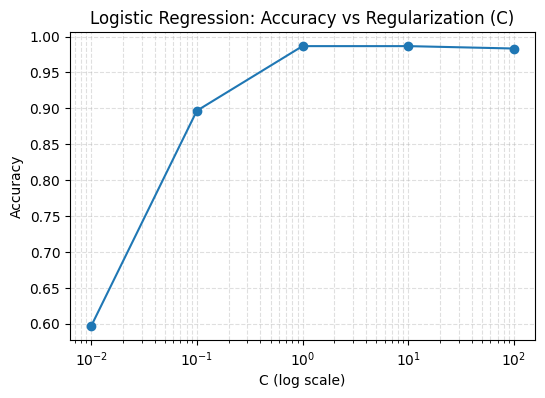

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# --- Assume you already have X1, y1 from earlier ---
# Train/test split (same as before; change test_size if you like)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

def plot_decision_surface(model, X, y, title):
    plt.figure(figsize=(6,6))
    # grid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # surface
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    # points with your desired markers
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red', marker='o', edgecolor='k', label='1')
    plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', marker='s', edgecolor='k', label='0')
    plt.xlabel("x1"); plt.ylabel("x2"); plt.title(title); plt.legend(); plt.show()

# ---- Train one logistic model (C=1.0 by default) and plot surface
logreg = LogisticRegression(C=1.0, solver='lbfgs', random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(f"Accuracy (C=1.0): {accuracy_score(y_test, y_pred):.3f}")
print("Coefficients [w1, w2]:", logreg.coef_[0], "Intercept b:", logreg.intercept_[0])

plot_decision_surface(logreg, X_test, y_test, "Logistic Regression (C=1.0)")

# ---- Sweep regularization strength C (bigger C = weaker regularization)
Cs = [0.01, 0.1, 1, 10, 100]
accs = []
for C in Cs:
    m = LogisticRegression(C=C, solver='lbfgs', random_state=42, max_iter=500)
    m.fit(X_train, y_train)
    accs.append(accuracy_score(y_test, m.predict(X_test)))
    print(f"C={C:<6}  Acc={accs[-1]:.3f}  w={m.coef_[0]}  b={m.intercept_[0]:.3f}")

# Quick accuracy vs C plot
plt.figure(figsize=(6,4))
plt.plot(Cs, accs, marker='o')
plt.xscale('log')
plt.xlabel("C (log scale)"); plt.ylabel("Accuracy")
plt.title("Logistic Regression: Accuracy vs Regularization (C)")
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.show()

* Probabilities plot (small dataset)

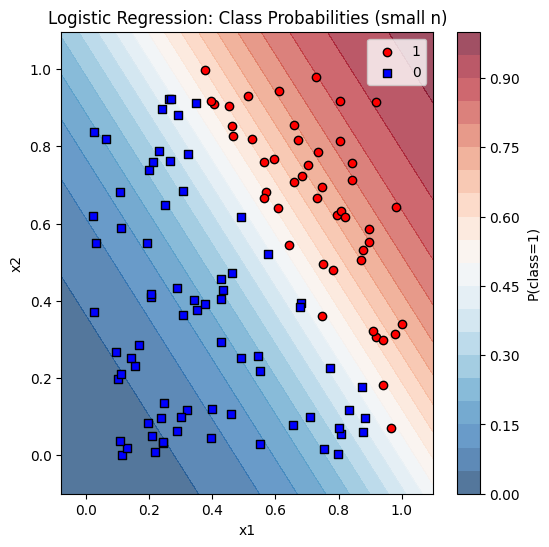

In [130]:
# Make a small dataset (e.g., 120 points) to see probabilities clearly
n_small = 120
x1_s = np.random.uniform(0, 1, n_small)
x2_s = np.random.uniform(0, 1, n_small)
y_s  = (x1_s + 0.7*x2_s >= 1).astype(int)
X_s  = np.column_stack((x1_s, x2_s))

# Train logistic regression on the small set
logreg_s = LogisticRegression(C=1.0, solver='lbfgs', random_state=0)
logreg_s.fit(X_s, y_s)

# Grid for probabilities
x_min, x_max = X_s[:,0].min() - 0.1, X_s[:,0].max() + 0.1
y_min, y_max = X_s[:,1].min() - 0.1, X_s[:,1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
proba = logreg_s.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)  # P(class=1)

plt.figure(figsize=(6,6))
# show probabilities as a smooth background
im = plt.contourf(xx, yy, proba, levels=20, cmap="RdBu_r", alpha=0.7)
cbar = plt.colorbar(im); cbar.set_label("P(class=1)")

# overlay true points with markers
plt.scatter(X_s[y_s==1,0], X_s[y_s==1,1], c='red', marker='o', edgecolor='k', label='1')
plt.scatter(X_s[y_s==0,0], X_s[y_s==0,1], c='blue', marker='s', edgecolor='k', label='0')

plt.xlabel("x1"); plt.ylabel("x2")
plt.title("Logistic Regression: Class Probabilities (small n)")
plt.legend(); plt.show()


# Bring in the LLM!

12. Here, we are going to use the ChatGPT to summarize the data about elements, and then use the information from our data set in the beginning of the notebook as features. This will be non-trivial process, because rather then working with the already provided data, we will have a chance to create our data set and discover that formats matter. Several steps:

# Answer 12:

- We want to get from ChatGPT table of the electronic properties of elements in the form where first column is element symbol, and the second column is metal/dielectric/semiconductor. It may take a few iterations - since ChatGPT will tend to introduce other forms of classification (e.g. metalloid). You can ask it early on to use Python form, that you can just cut and paste into Colab.

In [131]:
# Electronic properties of selected elements
elements_properties = {
    "H": "dielectric",
    "He": "dielectric",
    "Li": "metal",
    "Be": "metal",
    "B": "semiconductor",
    "C": "semiconductor",
    "N": "dielectric",
    "O": "dielectric",
    "F": "dielectric",
    "Ne": "dielectric",
    "Na": "metal",
    "Mg": "metal",
    "Al": "metal",
    "Si": "semiconductor",
    "P": "semiconductor",
    "S": "dielectric",
    "Cl": "dielectric",
    "Ar": "dielectric",
    "K": "metal",
    "Ca": "metal",
    "Ga": "semiconductor",
    "Ge": "semiconductor",
    "As": "semiconductor",
    "Se": "semiconductor",
    "Br": "dielectric",
    "Kr": "dielectric",
    "Rb": "metal",
    "Sr": "metal",
    "In": "semiconductor",
    "Sn": "semiconductor",
    "Sb": "semiconductor",
    "Te": "semiconductor",
    "I": "dielectric",
    "Xe": "dielectric",
    "Cs": "metal",
    "Ba": "metal",
    "Tl": "semiconductor",
    "Pb": "semiconductor",
    "Bi": "semiconductor"
}
import pandas as pd

df_elements = pd.DataFrame(list(elements_properties.items()),
                           columns=["Element", "Category"])
print(df_elements.head())


  Element       Category
0       H     dielectric
1      He     dielectric
2      Li          metal
3      Be          metal
4       B  semiconductor


- The dataframe df in the beginning of the notebook that has feature vectors, and the dataframe you will get from ChatGPT will have different number of elements. You will have to pick the ones that are common to both. The easy way to do it is to convert corresponding columns to lists, and then do something like this: new_list = list(set(list1) & set(list2)). Then pick from both dataframes only rows that have elements present in the new_list

In [132]:
# Convert columns to lists
list1 = df["Symbol"].tolist()
list2 = df_elements["Element"].tolist()

# Set intersection to get common elements
new_list = list(set(list1) & set(list2))

# Filter both DataFrames to only rows whose Element is in new_list
df_common = df[df["Symbol"].isin(new_list)].copy()
df_elements_common = df_elements[df_elements["Element"].isin(new_list)].copy()

# (Optional) sanity checks
print(f"Original df in atom.csv: {len(df)} rows")
print(f"Original df from ChatGPT: {len(df_elements)} rows")
print(f"Common elements: {len(new_list)}")
print(f"Filtered df_common: {len(df_common)} rows")
print(f"Filtered df_elements_common: {len(df_elements_common)} rows")


Original df in atom.csv: 84 rows
Original df from ChatGPT: 39 rows
Common elements: 0
Filtered df_common: 0 rows
Filtered df_elements_common: 0 rows


- One thing you will discover is that this operation will give you empty list the first time you do it. Try to identify the problem by examining the element symbols, and consider using operation like df['Symbol'] = df['Symbol'].str.strip()

In [133]:
# normalize symbols
df["Symbol"] = df["Symbol"].str.strip()


# 2) Convert columns to lists
list1 = df["Symbol"].tolist()
list2 = df_elements["Element"].tolist()

# 3) Set intersection to get common elements
new_list = list(set(list1) & set(list2))

# 4) Filter both DataFrames to only rows whose Element is in new_list
df_common = df[df["Symbol"].isin(new_list)].copy()
df_elements_common = df_elements[df_elements["Element"].isin(new_list)].copy()

# (Optional) sanity checks
print(f"Original df in atom.csv: {len(df)} rows")
print(f"Original df from ChatGPT: {len(df_elements)} rows")
print(f"Common elements: {len(new_list)}")
print(f"Filtered df_common: {len(df_common)} rows")
print(f"Filtered df_elements_common: {len(df_elements_common)} rows")


Original df in atom.csv: 84 rows
Original df from ChatGPT: 39 rows
Common elements: 39
Filtered df_common: 39 rows
Filtered df_elements_common: 39 rows


- With these, build classifier with the allbproperties from df as features and metal/dielectric/semiconductor as target. What is the precision?

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

# 1) Merge features with target
df_final = df_common.merge(df_elements_common, left_on="Symbol", right_on="Element", how="left")

# Features = all numeric columns except Symbol/Element/Category
X = df_final.drop(columns=["Symbol", "Element", "Category"])
y = df_final["Category"]

# 2) Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# 3) Train a classifier (Decision Tree as example)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 4) Predict
y_pred = clf.predict(X_test)

# 5) Precision (macro average across 3 classes)
precision = precision_score(y_test, y_pred, average="macro")
print("Precision (macro average):", precision)


Precision (macro average): 0.7202797202797203


- Calculate confusion matrix

Confusion Matrix:
[[4 5 3]
 [0 6 2]
 [0 0 8]]


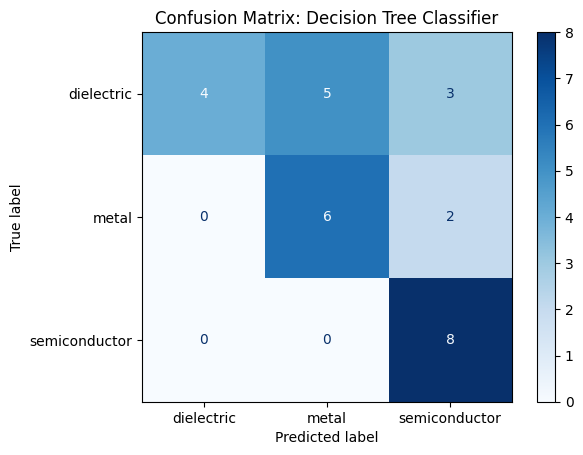

In [135]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1) Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# 2) Print raw numbers
print("Confusion Matrix:")
print(cm)

# 3) Nicely plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: Decision Tree Classifier")
plt.show()


- Pick 2 random features that you think are most predictive and plot decision boundary in feature space.  

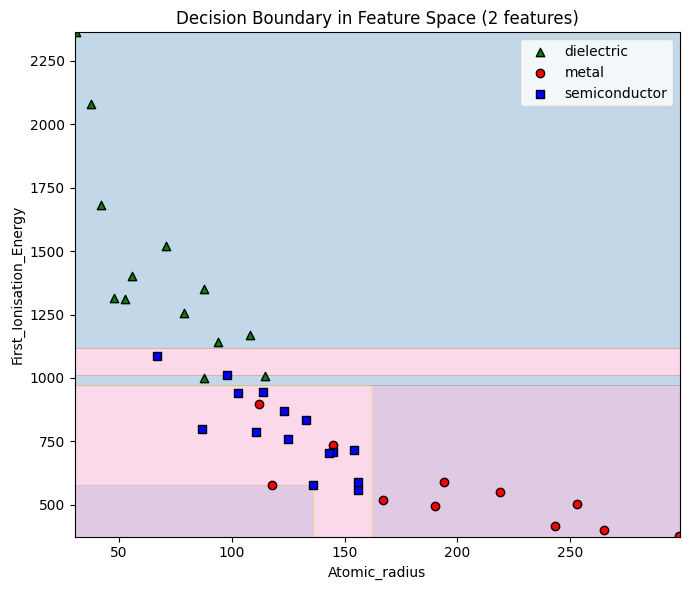

In [136]:

from sklearn.tree import DecisionTreeClassifier

# --- pick two features and target ---
feature_x = "Atomic_radius"
feature_y = "First_Ionisation_Energy"
X2 = df_final[[feature_x, feature_y]]           # DataFrame with names
y2 = df_final["Category"]

# --- fit classifier ---
clf2d = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2d.fit(X2, y2)

# --- grid with same column names (avoids the feature-names warning) ---
x_min, x_max = X2[feature_x].min() - 0.5, X2[feature_x].max() + 0.5
y_min, y_max = X2[feature_y].min() - 0.5, X2[feature_y].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

grid_df = pd.DataFrame({
    feature_x: xx.ravel(),
    feature_y: yy.ravel()
})

# --- predict on grid and convert labels -> ints for contourf ---
Z_labels = clf2d.predict(grid_df)  # strings like "metal", "semiconductor", "dielectric"

# consistent mapping based on the classifier's class order
classes = list(clf2d.classes_)                 # e.g., ['dielectric','metal','semiconductor']
class_to_int = {c:i for i,c in enumerate(classes)}
Z = np.array([class_to_int[z] for z in Z_labels]).reshape(xx.shape)

# --- plot decision regions ---
plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, levels=len(classes), alpha=0.3, cmap=plt.cm.Set1)

# --- plot points with distinct markers/colors ---
markers = {"metal": "o", "semiconductor": "s", "dielectric": "^"}
colors  = {"metal": "red", "semiconductor": "blue", "dielectric": "green"}
for cat in y2.unique():
    sel = (y2 == cat)
    plt.scatter(X2.loc[sel, feature_x],
                X2.loc[sel, feature_y],
                c=colors[cat], marker=markers[cat], edgecolor="k", label=cat)

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("Decision Boundary in Feature Space (2 features)")
plt.legend()
plt.tight_layout()
plt.show()


The decision boundaries are axis-aligned because we used a Decision Tree. If we used Logistic Regression, the boundary would be a straight line.